In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8

# Numeric Data EDA

In [2]:
path = '../input/prepared-numeric-data/'
numeric_train = pd.read_csv(path+"transformed_train.csv")
numeric_test = pd.read_csv(path+"transformed_test.csv")

In [3]:
numeric_train.head(3)

,name_similarity,description_similarity,price_diff,label
0,0.444444,0.000000,1.000000,1
1,0.571429,0.208333,0.016067,1
2,0.500000,0.000000,0.174917,1


In [4]:
numeric_test.head(3)

,name_similarity,description_similarity,price_diff,label
0,1.000000,0.000000,1.000000,1
1,0.666667,0.178571,0.200080,1
2,0.333333,0.129032,0.051026,1


## Price difference

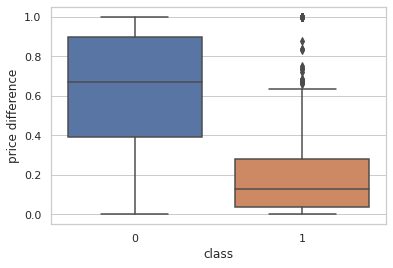

In [5]:
price_boxplot = sns.boxplot(x="label", y="price_diff", data=numeric_train)
price_boxplot.set(xlabel='class', ylabel='price difference')
plt.show()

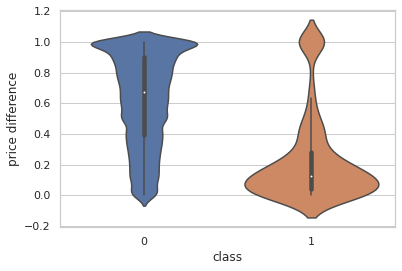

In [6]:
price_violin = sns.violinplot(x="label", y="price_diff", data=numeric_train)
price_violin.set(xlabel='class', ylabel='price difference')
plt.show()

## Name Similarity

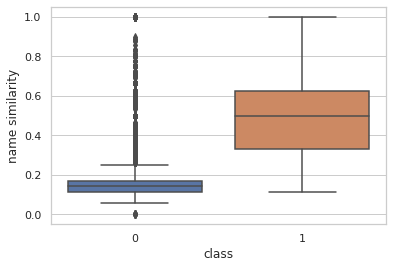

In [7]:
name_boxplot = sns.boxplot(x="label", y="name_similarity", data=numeric_train)
name_boxplot.set(xlabel='class', ylabel='name similarity')
plt.show()

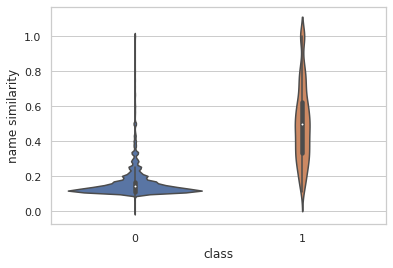

In [8]:
name_violin = sns.violinplot(x="label", y="name_similarity", data=numeric_train)
name_violin.set(xlabel='class', ylabel='name similarity')
plt.show()

## Description Similarity

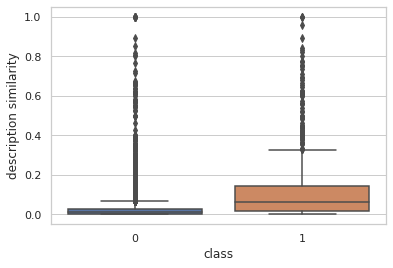

In [9]:
description_boxplot = sns.boxplot(x="label", y="description_similarity", data=numeric_train)
description_boxplot.set(xlabel='class', ylabel='description similarity')
plt.show()

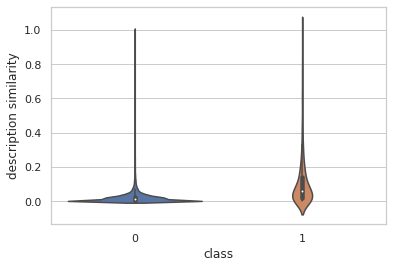

In [10]:
description_violin = sns.violinplot(x="label", y="description_similarity", data=numeric_train)
description_violin.set(xlabel='class', ylabel='description similarity')
plt.show()

# Text Data EDA

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
path = '../input/prepared-data/'
train_data = pd.read_csv(path+"train_data.csv")
test_data = pd.read_csv(path+"test_data.csv")

In [13]:
train_data.head(3)

,similarity,idAmazon,idGoogle,amazon_name,google_name,amazon_description,google_description,amazon_info,google_info,amazon_price,google_price,price_diff,label
0,0.44,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...,noahs ark activity center jewel case ages,beginners bible noahs ark activity center acti...,,,noahs ark activity center jewel case ages,beginners bible noahs ark activity center acti...,0.00,9.95,1.000000,1
1,0.57,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...,peachtree sage premium accounting nonprofits,sage ptree vernfprt premium accounting nonprofits,peachtree premium accounting nonprofits afford...,youre like nonprofit organizations youre const...,peachtree sage premium accounting nonprofits p...,sage ptree vernfprt premium accounting nonprof...,599.99,590.35,0.016067,1
2,0.50,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...,singing coach unlimited,singing coach unlimited electronic learning pr...,singing coach unlimited electronic learning pr...,learn sing help patented realtime pitch recogn...,singing coach unlimited singing coach unlimite...,singing coach unlimited electronic learning pr...,99.99,82.50,0.174917,1


In [14]:
test_data.head(3)

,similarity,idAmazon,idGoogle,amazon_name,google_name,amazon_description,google_description,amazon_info,google_info,amazon_price,google_price,price_diff,label
0,1.00,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...,clickart premier image pack dvdrom,clickart premier image pack dvdrom,,massive collection images fonts design needs o...,clickart premier image pack dvdrom,clickart premier image pack dvdrom massive col...,0.00,48.95,1.000000,1
1,0.67,b0000dbykm,http://www.google.com/base/feeds/snippets/1843...,mias math adventure time,kutoka interactive mias math adventure time,mias math adventure time children help mia sav...,mias math adventure tells captivating story ed...,mias math adventure time mias math adventure t...,kutoka interactive mias math adventure time mi...,19.99,24.99,0.200080,1
2,0.33,b0000dbykm,http://www.google.com/base/feeds/snippets/1836...,mias math adventure time,kutoka interactive mias math adventure time wi...,mias math adventure time children help mia sav...,kutoka interactive mia math adventure proposes...,mias math adventure time mias math adventure t...,kutoka interactive mias math adventure time wi...,19.99,18.97,0.051026,1


## Text Length Distribution

### Name Length Distribution

In [15]:
len(train_data["amazon_name"][2].split())

3

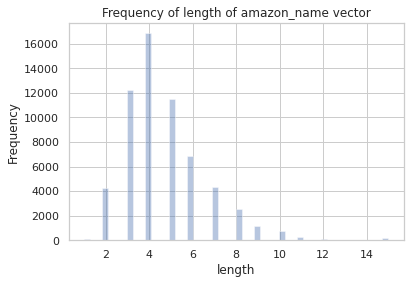

In [16]:
amazon_name_len = [len(text.split()) for text in train_data["amazon_name"]]
amazon_name_len_hist = sns.distplot(amazon_name_len,rug=False, hist=True, kde=False)
amazon_name_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of amazon_name vector")
plt.show()

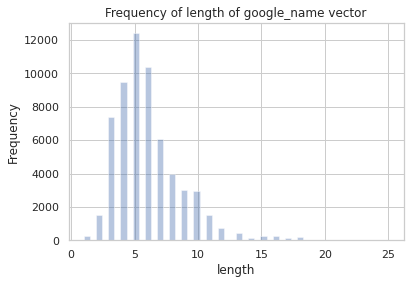

In [17]:
google_name_len = [len(text.split()) for text in train_data["google_name"]]
google_name_len_hist = sns.distplot(google_name_len,rug=False, hist=True, kde=False)
google_name_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of google_name vector")
plt.show()

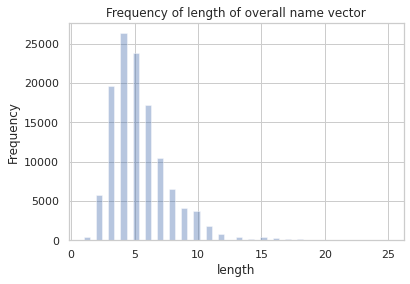

In [18]:
name_len = amazon_name_len + google_name_len
name_len_hist = sns.distplot(name_len,rug=False, hist=True, kde=False)
name_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of overall name vector")
plt.show()

### Description Length Distribution

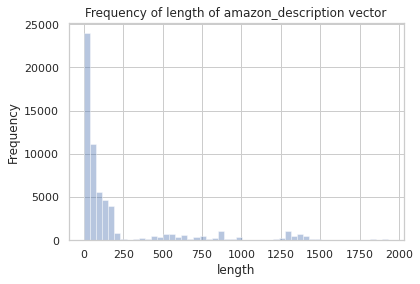

In [19]:
amazon_description_len = [len(text.split()) for text in train_data["amazon_description"]]
amazon_description_len_hist = sns.distplot(amazon_description_len,rug=False, hist=True, kde=False)
amazon_description_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of amazon_description vector")
plt.show()

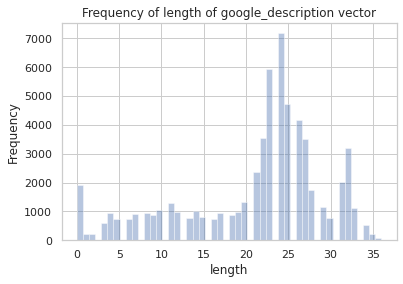

In [20]:
google_description_len = [len(text.split()) for text in train_data["google_description"]]
google_description_len_hist = sns.distplot(google_description_len,rug=False, hist=True, kde=False)
google_description_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of google_description vector")
plt.show()

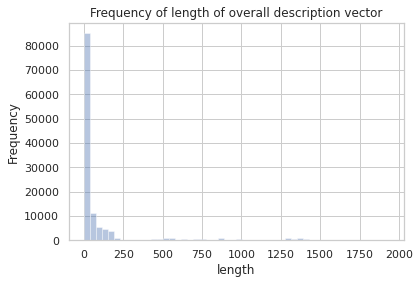

In [21]:
description_len = amazon_description_len + google_description_len
description_len_hist = sns.distplot(description_len,rug=False, hist=True, kde=False)
description_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of overall description vector")
plt.show()

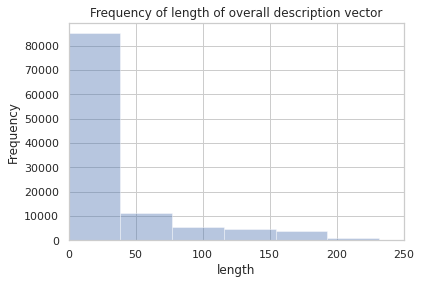

In [22]:
description_len = amazon_description_len + google_description_len
description_len_hist = sns.distplot(description_len,rug=False, hist=True, kde=False)
description_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of overall description vector")
plt.xlim(0, 250)
plt.show()

### Info (Name+Description) Length Distribution

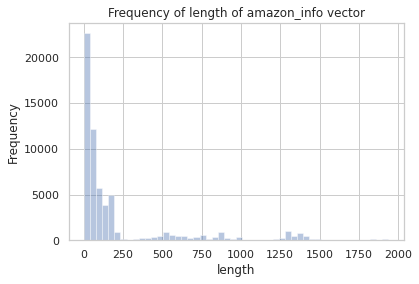

In [23]:
amazon_info_len = [len(text.split()) for text in train_data["amazon_info"]]
amazon_info_len_hist = sns.distplot(amazon_info_len,rug=False, hist=True, kde=False)
amazon_info_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of amazon_info vector")
plt.show()

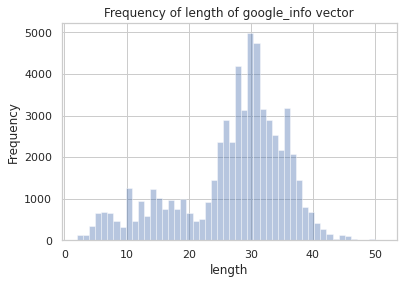

In [24]:
google_info_len = [len(text.split()) for text in train_data["google_info"]]
google_info_len_hist = sns.distplot(google_info_len,rug=False, hist=True, kde=False)
google_info_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of google_info vector")
plt.show()

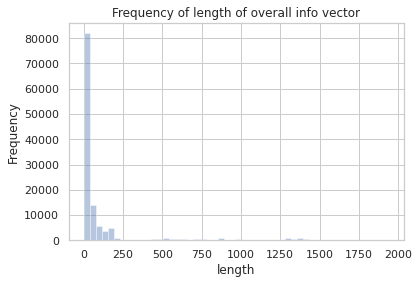

In [25]:
info_len = amazon_info_len + google_info_len
info_len_hist = sns.distplot(info_len,rug=False, hist=True, kde=False)
info_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of overall info vector")
plt.show()

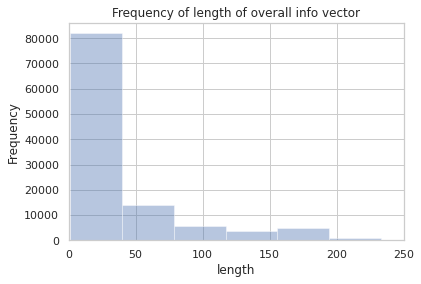

In [26]:
info_len = amazon_info_len + google_info_len
info_len_hist = sns.distplot(info_len,rug=False, hist=True, kde=False)
info_len_hist.set(xlabel='length', ylabel='Frequency',title="Frequency of length of overall info vector")
plt.xlim(0,250)
plt.show()

# ======所以MaxLen为200是合理的======

In [27]:
def tokenizer (text, maxlen):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    #convert to integer lists
    sequences = tokenizer.texts_to_sequences(text)
    # padding
    sequences = pad_sequences(sequences, maxlen)
    word_index = tokenizer.word_index
    print("Found %s unique tokens"%len(word_index))
    return sequences, word_index

In [28]:
data_amazon_text = train_data["amazon_info"].tolist()
data_google_text = train_data["google_info"].tolist()
# Combine all text data
data_text = data_amazon_text + data_google_text
# Tokenization 
maxlen = 200 # only consider the first 200 words per sample
data_sequences, data_word_index = tokenizer(data_text, maxlen)

Found 15332 unique tokens


In [29]:
data_word_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [30]:
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

In [31]:
all_words = []
for text in data_text:
    word_list = text.split()
    all_words += word_list
# print(all_words)

In [32]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

### 100 common words in training set

In [33]:
def all_texts(data):
    data_amazon_text = data["amazon_info"].tolist()
    data_google_text = data["google_info"].tolist()
    data_text = data_amazon_text + data_google_text
    return data_text

def all_words(data_text):
    all_words = []
    for text in data_text:
        word_list = text.split()
        all_words += word_list
    return all_words    

In [34]:
data_texts = all_texts(train_data)
data_words = all_words(data_text)

In [35]:
def common_words_plot(data_words):
    mostcommon = FreqDist(data_words).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Top 100 Most Common Words', fontsize=80)
    plt.tight_layout(pad=0)
    plt.show()

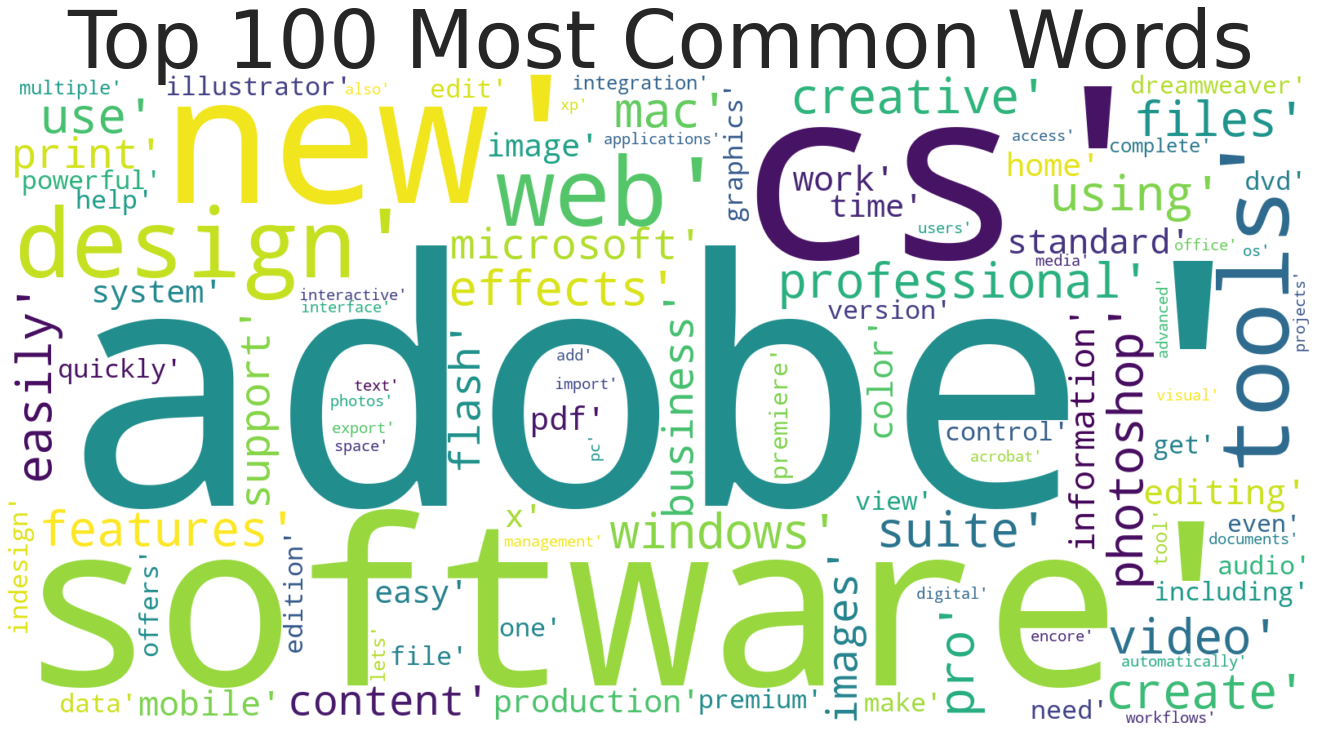

In [36]:
common_words_plot(data_words)

### Frequency of 50 Most Common Words in Training set

In [37]:
def words_freq_plot(data_words):
    mostcommon_small = FreqDist(data_words).most_common(50)
    x, y = zip(*mostcommon_small)
    plt.figure(figsize=(30,10))
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=30)
    plt.ylabel('Frequency of Words', fontsize=30)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=60, fontsize=20)
    plt.title('Frequency of 50 Most Common Words', fontsize=40)
    plt.show()
    return x

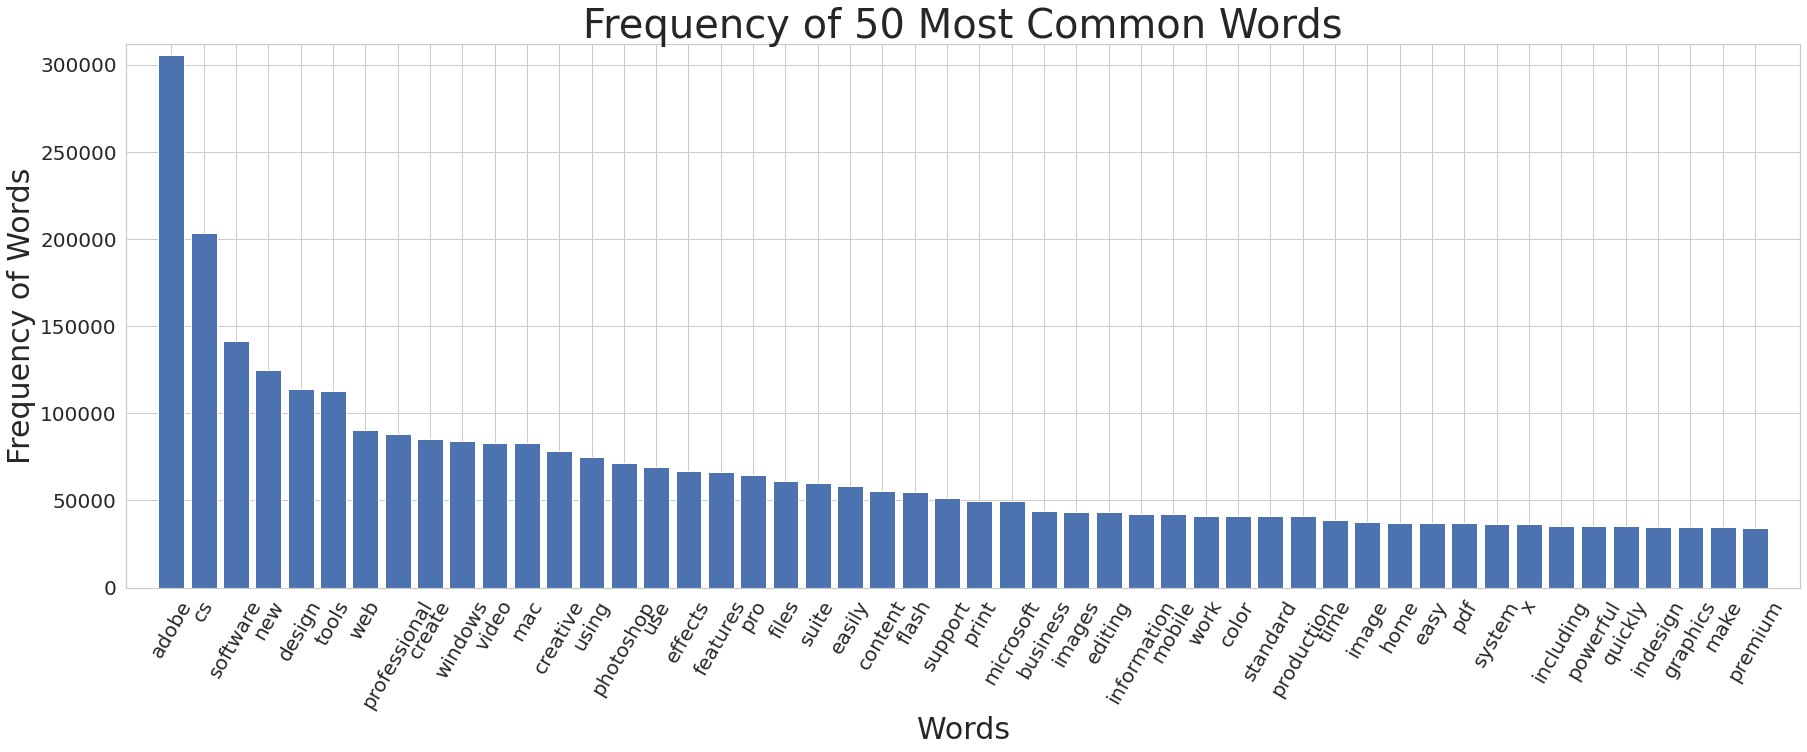

('adobe', 'cs', 'software', 'new', 'design', 'tools', 'web', 'professional', 'create', 'windows', 'video', 'mac', 'creative', 'using', 'photoshop', 'use', 'effects', 'features', 'pro', 'files', 'suite', 'easily', 'content', 'flash', 'support', 'print', 'microsoft', 'business', 'images', 'editing', 'information', 'mobile', 'work', 'color', 'standard', 'production', 'time', 'image', 'home', 'easy', 'pdf', 'system', 'x', 'including', 'powerful', 'quickly', 'indesign', 'graphics', 'make', 'premium')


In [38]:
words_50 = words_freq_plot(data_words)
print(words_50)

### Frequency of 50 Most Common Words in Positive Class

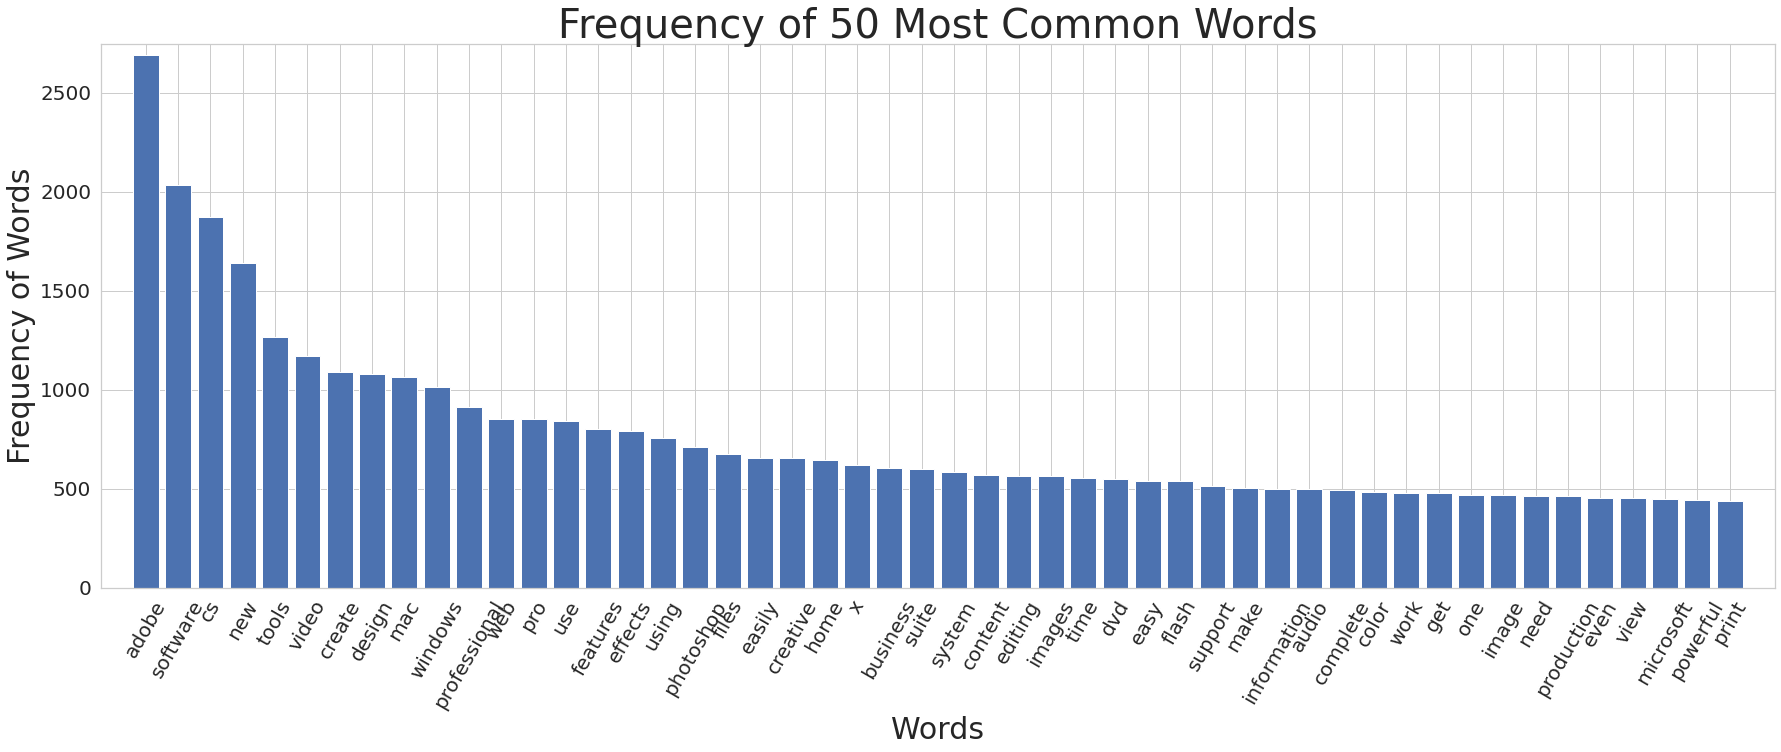

('adobe', 'software', 'cs', 'new', 'tools', 'video', 'create', 'design', 'mac', 'windows', 'professional', 'web', 'pro', 'use', 'features', 'effects', 'using', 'photoshop', 'files', 'easily', 'creative', 'home', 'x', 'business', 'suite', 'system', 'content', 'editing', 'images', 'time', 'dvd', 'easy', 'flash', 'support', 'make', 'information', 'audio', 'complete', 'color', 'work', 'get', 'one', 'image', 'need', 'production', 'even', 'view', 'microsoft', 'powerful', 'print')


In [39]:
# retrieve all the positive data
pos_data = train_data.iloc[np.squeeze(np.where(train_data["label"] == 1)),]

# split all texts get all words in positive class
pos_texts = all_texts(pos_data)
pos_words = all_words(pos_texts)

# plot top 50 word freqs in positive class
pos_words_50 = words_freq_plot(pos_words)
print(pos_words_50)

### Frequency of 50 Most Common Words in Negative Class

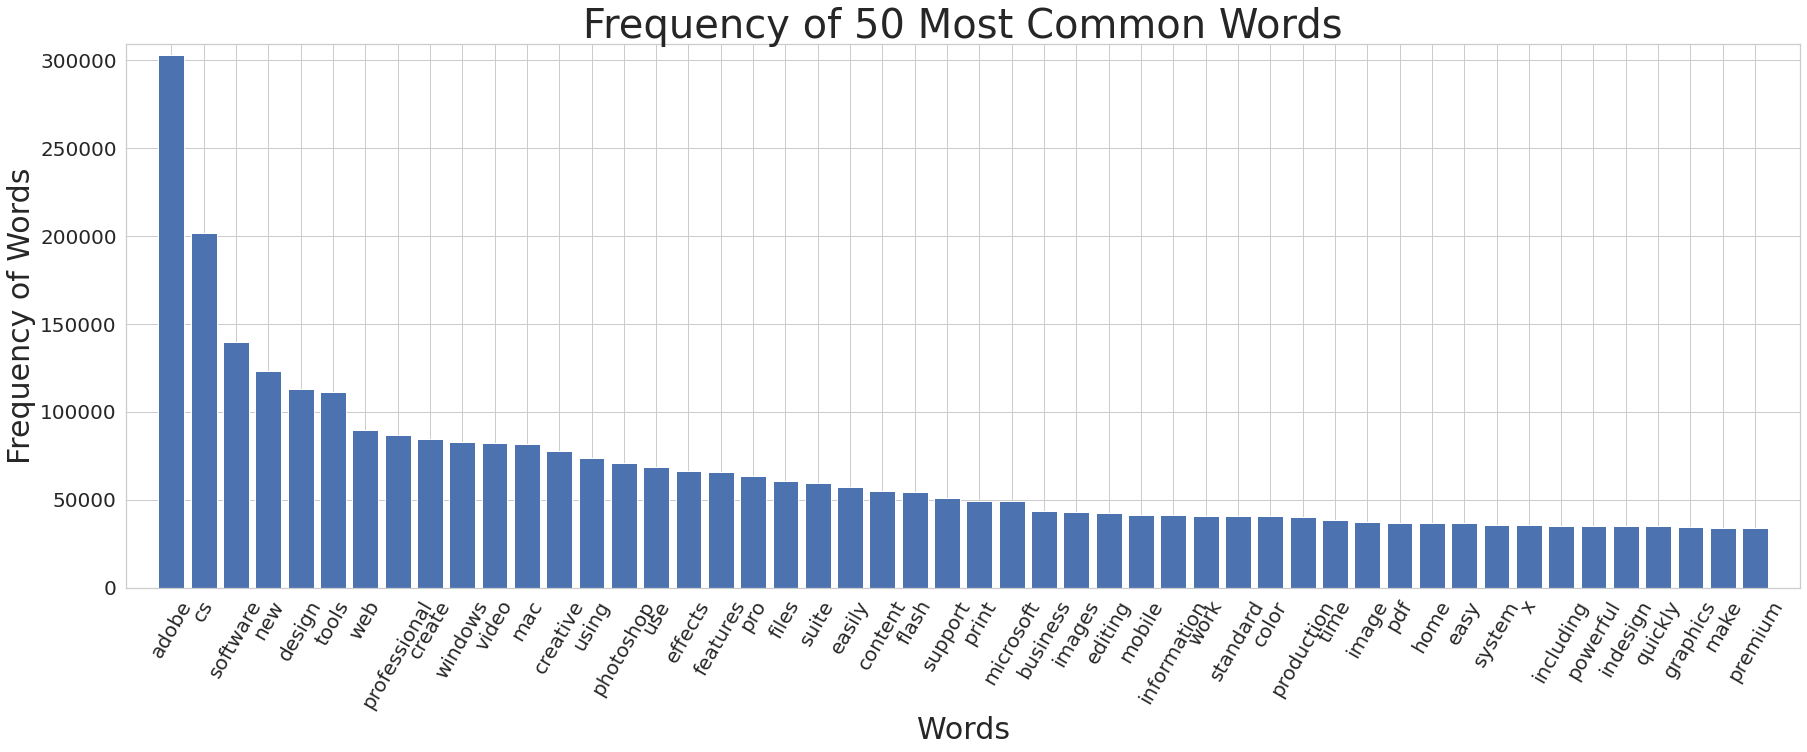

('adobe', 'cs', 'software', 'new', 'design', 'tools', 'web', 'professional', 'create', 'windows', 'video', 'mac', 'creative', 'using', 'photoshop', 'use', 'effects', 'features', 'pro', 'files', 'suite', 'easily', 'content', 'flash', 'support', 'print', 'microsoft', 'business', 'images', 'editing', 'mobile', 'information', 'work', 'standard', 'color', 'production', 'time', 'image', 'pdf', 'home', 'easy', 'system', 'x', 'including', 'powerful', 'indesign', 'quickly', 'graphics', 'make', 'premium')


In [40]:
# retrieve all the negative data
neg_data = train_data.iloc[np.squeeze(np.where(train_data["label"] == 0)),]

# split all texts get all words in negative class
neg_texts = all_texts(neg_data)
neg_words = all_words(neg_texts)

# plot top 50 word freqs in negative class
neg_words_50 = words_freq_plot(neg_words)
print(neg_words_50)

In [41]:
len(list(set(pos_words_50) & set(neg_words_50)))

42

Remove top 50 words in both classes

# 尝试Word2Vec

In [42]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

import tensorflow as tf
import keras
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from keras.layers import Embedding
from keras.models import Model
from keras import layers
from keras import Input
from keras import optimizers
from tensorflow.keras import regularizers

/opt/conda/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [43]:
# load the pretrained model
word_vectors = KeyedVectors.load_word2vec_format('../input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)

def getWord2VecMatrix(max_words, embedding_dim, word_index):
    '''
    Returns the embedding matrix of text data using the pre-trained GloVe data set.
    '''
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in word_index.items():
        if i>max_words:
            continue
        try:
            embedding_vector = word_vectors[word]
            embedding_matrix[i-1] = embedding_vector
        except KeyError:
            embedding_matrix[i-1]=np.random.normal(0,np.sqrt(0.25),embedding_dim)
    return embedding_matrix        

In [44]:
data_word_index.items()

dict_items([('adobe', 1), ('cs', 2), ('software', 3), ('new', 4), ('design', 5), ('tools', 6), ('web', 7), ('professional', 8), ('create', 9), ('windows', 10), ('video', 11), ('mac', 12), ('creative', 13), ('using', 14), ('photoshop', 15), ('use', 16), ('effects', 17), ('features', 18), ('pro', 19), ('files', 20), ('suite', 21), ('easily', 22), ('content', 23), ('flash', 24), ('support', 25), ('print', 26), ('microsoft', 27), ('business', 28), ('images', 29), ('editing', 30), ('information', 31), ('mobile', 32), ('work', 33), ('color', 34), ('standard', 35), ('production', 36), ('time', 37), ('image', 38), ('home', 39), ('easy', 40), ('pdf', 41), ('system', 42), ('x', 43), ('including', 44), ('powerful', 45), ('quickly', 46), ('indesign', 47), ('graphics', 48), ('make', 49), ('premium', 50), ('need', 51), ('file', 52), ('data', 53), ('get', 54), ('audio', 55), ('illustrator', 56), ('one', 57), ('dvd', 58), ('edition', 59), ('view', 60), ('help', 61), ('edit', 62), ('control', 63), ('ve

In [45]:
max_words = len(data_word_index)
embedding_dim = 300
embedding_matrix = getWord2VecMatrix(max_words, embedding_dim, data_word_index)
del word_vectors

In [46]:
print(embedding_matrix.shape)
embedding_matrix

(15332, 300)


array([[ 0.07373047, -0.14941406, -0.14648438, ..., -0.21191406,
         0.00897217,  0.18164062],
       [-0.16992188,  0.16699219,  0.265625  , ..., -0.13574219,
        -0.17578125,  0.39648438],
       [ 0.20410156, -0.30078125, -0.01391602, ..., -0.0144043 ,
        -0.03735352,  0.10742188],
       ...,
       [ 0.22558594,  0.5625    ,  0.10791016, ..., -0.12695312,
         0.1875    ,  0.16210938],
       [ 0.16992188, -0.18261719, -0.15136719, ..., -0.06176758,
         0.26367188,  0.0279541 ],
       [-0.75127365, -0.51583735, -0.00147804, ...,  0.50150376,
         0.19656605,  0.50820318]])

In [47]:
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Select all positive samples after indexing
positive_index = np.squeeze(np.where(train_data["label"] == 1))
positive_samples = train_data.iloc[positive_index.tolist(),:]
# Select hard negative samples
negative_index = np.squeeze(np.where(train_data["label"] == 0))
negative_data = train_data.iloc[negative_index.tolist(),:]
negative_data_sorted = negative_data.sort_values("similarity",ascending=False)
negative_samples = negative_data_sorted.iloc[0:1045]
data_samples = pd.concat([positive_samples,negative_samples])
X = data_samples[["idAmazon","idGoogle","amazon_info","google_info","price_diff"]]
y = data_samples["label"]
X, y = shuffle(X, y)

In [48]:
from sklearn.model_selection import train_test_split

X, y = shuffle(X, y)
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.1,random_state=2)

print("train_X: "+str(len(train_X)))
print("%s is 0"%len(*np.where(train_y==0))+" and %s is 1"%len(*np.where(train_y==1))+"\n")
print("val_X: "+str(len(val_X)))
print("%s is 0"%len(*np.where(val_y==0))+" and %s is 1"%len(*np.where(val_y==1)))

train_X: 1881
944 is 0 and 937 is 1

val_X: 209
101 is 0 and 108 is 1


In [49]:
# Extract text , label from training data
train_amazon_text = train_X["amazon_info"].tolist()
train_google_text = train_X["google_info"].tolist()
train_price_diff = np.asarray(train_X["price_diff"])
train_labels = np.asarray(train_y)
# train_amazon_price = train_data["amazon_price"]

# Extract text , label from training data
val_amazon_text = val_X["amazon_info"].tolist()
val_google_text = val_X["google_info"].tolist()
val_price_diff = np.asarray(val_X["price_diff"])
val_labels = np.asarray(val_y)

# Extract text , label from testing data
test_amazon_text =test_data["amazon_info"].tolist()
test_google_text = test_data["google_info"].tolist()
test_price_diff = test_data["price_diff"]
test_labels = np.asarray(test_data["label"])

In [50]:
print(str(len(train_amazon_text))+" "+str(len(train_google_text))+" "+str(len(train_labels)))
print(str(len(val_amazon_text))+" "+str(len(val_google_text))+" "+str(len(val_labels)))
print(str(len(test_amazon_text))+" "+str(len(test_google_text))+" "+str(len(test_labels)))

1881 1881 1881
209 209 209
3487 3487 3487


In [51]:
# Tokenization 

maxlen = 200

# for training data
train_amazon_sequences, train_amazon_word_index = tokenizer(train_amazon_text, maxlen)
train_google_sequences, train_google_word_index = tokenizer(train_google_text, maxlen)
# for val data
val_amazon_sequences, val_amazon_word_index = tokenizer(val_amazon_text, maxlen)
val_google_sequences, val_google_word_index = tokenizer(val_google_text, maxlen)
# for testing data
test_amazon_sequences, test_amazon_word_index = tokenizer(test_amazon_text, maxlen)
test_google_sequences, test_google_word_index = tokenizer(test_google_text, maxlen)

Found 11267 unique tokens
Found 5298 unique tokens
Found 5454 unique tokens
Found 1694 unique tokens
Found 5845 unique tokens
Found 3744 unique tokens


In [52]:
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

def siamese_lstm(): #opt, lr
    amazon_input = Input(shape=(maxlen, ))
    google_input = Input(shape=(maxlen, ))
    price_diff = Input(shape=(1,))
    
    # Embedding layer
    embedding_layer = layers.Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False)
    embedded_amazon = embedding_layer(amazon_input)
    embedded_google = embedding_layer(google_input)
    # Shared LSTM layer
    shared_lstm = layers.LSTM(64, return_sequences=True, activation='relu')
    lstm_amazon = shared_lstm(embedded_amazon)
    lstm_google = shared_lstm(embedded_google)
    
    flatten_amazon = layers.Flatten()(lstm_amazon)
    flatten_google = layers.Flatten()(lstm_google)
    
    # Construct the first feature
    diff = layers.Subtract()([flatten_amazon,flatten_google])
    diff_sqrt = layers.Multiply()([diff,diff])
    
    # Construct the second feature
    sqrt_amazon = layers.Multiply()([flatten_amazon,flatten_amazon])
    sqrt_google = layers.Multiply()([flatten_google,flatten_google])
    sqrt_diff = layers.Subtract()([sqrt_amazon, sqrt_google])
    
    # Construct the third feature
    cos_sim = layers.Lambda(cosine_distance, output_shape=cos_dist_output_shape)([flatten_amazon,flatten_google])
    
    concatenated = layers.concatenate([diff_sqrt, sqrt_diff, cos_sim, price_diff],axis=-1)
    
    dense_1 = layers.Dense(32, activation='relu', bias_regularizer=regularizers.l2(0.1))(concatenated)
#     dense_1 = layers.Dropout(0.01)(dense_1)
    
    out = layers.Dense(1, activation='sigmoid')(dense_1)
    
    model = Model([amazon_input, google_input, price_diff], out)
    model.summary()
    
#     model.compile(loss="binary_crossentropy", metrics=['acc'，custom_f1], optimizer=opt(learning_rate = lr))
    
    return model

In [53]:
# model = siamese_lstm(optimizers.Adam, 0.0001)
model = siamese_lstm()
model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=optimizers.Adam(0.0001))
history = model.fit([train_amazon_sequences, train_google_sequences, train_price_diff], train_labels,
                     epochs = 15, batch_size = 32,
                     validation_data=([val_amazon_sequences, val_google_sequences, val_price_diff], val_labels))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:820: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if (isinstance(inputs, collections.Sequence)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 300)     4599600     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 200, 64)      93440       embedding[0][0]              

/opt/conda/lib/python3.7/site-packages/tensorflow/python/training/tracking/data_structures.py:718: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(wrapped_dict, collections.Mapping):


59/59 [==============================] - 11s 187ms/step - loss: 0.6393 - acc: 0.6406 - val_loss: 0.6453 - val_acc: 0.6411
Epoch 2/15
59/59 [==============================] - 11s 184ms/step - loss: 0.6107 - acc: 0.6661 - val_loss: 0.6343 - val_acc: 0.6507
Epoch 3/15
59/59 [==============================] - 10s 175ms/step - loss: 0.5852 - acc: 0.6842 - val_loss: 0.6263 - val_acc: 0.6842
Epoch 4/15
59/59 [==============================] - 10s 174ms/step - loss: 0.5588 - acc: 0.7129 - val_loss: 0.6172 - val_acc: 0.6746
Epoch 5/15
59/59 [==============================] - 10s 172ms/step - loss: 0.5386 - acc: 0.7246 - val_loss: 0.5993 - val_acc: 0.6651
Epoch 6/15
59/59 [==============================] - 10s 171ms/step - loss: 0.5063 - acc: 0.7544 - val_loss: 0.6076 - val_acc: 0.6890
Epoch 7/15
59/59 [==============================] - 11s 183ms/step - loss: 0.4803 - acc: 0.7778 - val_loss: 0.5995 - val_acc: 0.6555
Epoch 8/15
59/59 [==============================] - 10s 176ms/step - loss: 0.477

In [54]:
plot_train_val_loss(history)
plot_train_val_acc(history)

NameError: name 'plot_train_val_loss' is not defined

In [55]:
prob_y = model.predict([val_amazon_sequences, val_google_sequences, val_price_diff],verbose=1)

pred_y = np.empty((len(prob_y)),dtype='int')

pred_y = np.where(prob_y>0.6,1,0)

print(pred_y)

7/7 [==============================] - 0s 33ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [56]:
cm = confusion_matrix(val_labels,pred_y)
cm_plot_labels = ['non matching','matching']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

NameError: name 'plot_confusion_matrix' is not defined

In [57]:
import matplotlib.pyplot as plt

def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss)+1)
    plt.figure()
    plt.plot(epochs, loss, 'blue', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
def plot_train_val_acc(history):
    acc = history.history['acc']
    val_acc = history.history["val_acc"]
    epochs = range(1, len(acc)+1)
    plt.figure()
    plt.plot(epochs, acc, 'blue', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.show()

In [58]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')